# Data Pre-processing and Visualization

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import random

from scipy import stats

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.neural_network import MLPClassifier 
from sklearn.svm import SVC 
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

from warnings import filterwarnings
filterwarnings('ignore')

matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

data = pd.read_excel("data.xlsx")
raw_data = pd.read_excel("raw_data.xlsx")
df = data.copy()

In [4]:
raw_data = raw_data[raw_data["conformity_ec"] == 0]
raw_data.drop(["Paper No", "Specimen", "conformity_ec", "hw/lw", "Agb/Ag"], axis=1, inplace=True)
raw_data.head()

,tw (mm),lw (mm),hw (mm),M/(V.L),P/(Ag.fc),fc (MPa),Agb (cm2),ρbl.fybl (MPa),ρsh.fysh (MPa),ρl.fyl (MPa),ρt.fyt (MPa),v_test (kN),failure_mode
0,150.0,1000,2200.0,2.20,0.00,30.5,300.0,5.652500,7.395000,2.847500,3.740000,155.15,3.0
1,150.0,1400,2000.0,1.43,0.01,46.8,0.0,0.000000,0.000000,4.410368,2.021229,666.82,3.0
2,150.0,1400,2000.0,1.43,0.01,46.6,0.0,0.000000,0.000000,7.725619,2.021229,787.40,1.0
3,127.0,1625,12000.0,7.38,0.10,49.0,771.4,2.956163,2.667677,1.219476,1.177428,144.75,3.0
4,100.0,700,1600.0,2.50,0.15,27.4,100.0,14.732880,0.000000,2.673600,2.655481,143.15,2.0


In [ ]:
raw_data.dropna(inplace=True, axis=0)

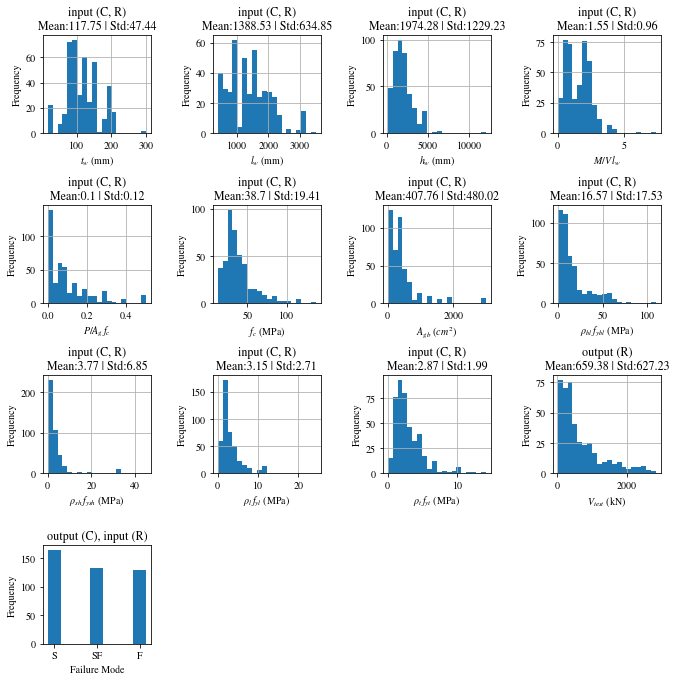

In [13]:
axes = raw_data.hist(column=raw_data.columns.to_list(), grid=True, figsize=(10,10), bins=20, layout=(4, 4))
plt.tight_layout(pad=4.0)

axes[0, 0].set_title(f"input (C, R)\nMean:{round(raw_data['tw (mm)'].mean(), 2)} | Std:{round(raw_data['tw (mm)'].std(), 2)}")
axes[0, 0].set_xlabel(r"$t_w$ (mm)")
axes[0, 0].set_ylabel("Frequency")

axes[0, 1].set_title(f"input (C, R)\nMean:{round(raw_data['lw (mm)'].mean(), 2)} | Std:{round(raw_data['lw (mm)'].std(), 2)}")
axes[0, 1].set_xlabel(r"$l_w$ (mm)")
axes[0, 1].set_ylabel("Frequency")

axes[0, 2].set_title(f"input (C, R)\nMean:{round(raw_data['hw (mm)'].mean(), 2)} | Std:{round(raw_data['hw (mm)'].std(), 2)}")
axes[0, 2].set_xlabel(r"$h_w$ (mm)")
axes[0, 2].set_ylabel("Frequency")

axes[0, 3].set_title(f"input (C, R)\nMean:{round(raw_data['M/(V.L)'].mean(), 2)} | Std:{round(raw_data['M/(V.L)'].std(), 2)}")
axes[0, 3].set_xlabel(r"$M/V\,l_w$")
axes[0, 3].set_ylabel("Frequency")

axes[1, 0].set_title(f"input (C, R)\nMean:{round(raw_data['P/(Ag.fc)'].mean(), 2)} | Std:{round(raw_data['P/(Ag.fc)'].std(), 2)}")
axes[1, 0].set_xlabel(r"$P/A_{g}\,f_{c}$")
axes[1, 0].set_ylabel("Frequency")

axes[1, 1].set_title(f"input (C, R)\nMean:{round(raw_data['fc (MPa)'].mean(), 2)} | Std:{round(raw_data['fc (MPa)'].std(), 2)}")
axes[1, 1].set_xlabel(r"$f_c$ (MPa)")
axes[1, 1].set_ylabel("Frequency")

axes[1, 2].set_title(f"input (C, R)\nMean:{round(raw_data['Agb (cm2)'].mean(), 2)} | Std:{round(raw_data['Agb (cm2)'].std(), 2)}")
axes[1, 2].set_xlabel(r"$A_{gb}$ $(cm^2)$")
axes[1, 2].set_ylabel("Frequency")

axes[1, 3].set_title(f"input (C, R)\nMean:{round(raw_data['ρbl.fybl (MPa)'].mean(), 2)} | Std:{round(raw_data['ρbl.fybl (MPa)'].std(), 2)}")
axes[1, 3].set_xlabel(r"$ρ_{bl}\,f_{ybl}$ (MPa)")
axes[1, 3].set_ylabel("Frequency")

axes[2, 0].set_title(f"input (C, R)\nMean:{round(raw_data['ρsh.fysh (MPa)'].mean(), 2)} | Std:{round(raw_data['ρsh.fysh (MPa)'].std(), 2)}")
axes[2, 0].set_xlabel(r"$ρ_{sh}\,f_{ysh}$ (MPa)")
axes[2, 0].set_ylabel("Frequency")

axes[2, 1].set_title(f"input (C, R)\nMean:{round(raw_data['ρl.fyl (MPa)'].mean(), 2)} | Std:{round(raw_data['ρl.fyl (MPa)'].std(), 2)}")
axes[2, 1].set_xlabel(r"$ρ_l\,f_{yl}$ (MPa)")
axes[2, 1].set_ylabel("Frequency")

axes[2, 2].set_title(f"input (C, R)\nMean:{round(raw_data['ρt.fyt (MPa)'].mean(), 2)} | Std:{round(raw_data['ρt.fyt (MPa)'].std(), 2)}")
axes[2, 2].set_xlabel(r"$ρ_t\,f_{yt}$ (MPa)")
axes[2, 2].set_ylabel("Frequency")

axes[2, 3].set_title(f"output (R)\nMean:{round(raw_data['v_test (kN)'].mean(), 2)} | Std:{round(raw_data['v_test (kN)'].std(), 2)}")
axes[2, 3].set_xlabel(r"$V_{test}$ (kN)")
axes[2, 3].set_ylabel("Frequency")

axes[3, 0].clear()
axes[3, 0].bar(["S", "SF", "F"], raw_data["failure_mode"].value_counts(), width=0.3)
axes[3, 0].set_title("output (C), input (R)")
axes[3, 0].set_xlabel("Failure Mode")
axes[3, 0].set_ylabel("Frequency")

plt.show()

In [15]:
df = df[df["conformity_ec"] == 0]
df.drop(["Paper No", "Specimen", "conformity_ec", "hw/lw", "Agb/Ag",
       "v_test", "v_ec8", "Ag"], axis=1, inplace=True)
df.head()

,tw,lw,hw,M/(V.lw),P/(Ag.fc),fc,Agb,ρbl.fybl,ρsh.fysh,ρl.fyl,ρt.fyt,failure_mode
0,150.0,1000,2200.0,2.20,0.00,30.5,30000.0,5.652500,7.395000,2.847500,3.740000,3.0
1,150.0,1400,2000.0,1.43,0.01,46.8,0.0,0.000000,0.000000,4.410368,2.021229,3.0
2,150.0,1400,2000.0,1.43,0.01,46.6,0.0,0.000000,0.000000,7.725619,2.021229,1.0
3,127.0,1625,12000.0,7.38,0.10,49.0,77140.0,2.956163,2.667677,1.219476,1.177428,3.0
4,100.0,700,1600.0,2.50,0.15,27.4,10000.0,14.732880,0.000000,2.673600,2.655481,2.0


In [16]:
df.shape

(454, 12)

In [17]:
df.isnull().sum()

tw               0
lw               0
hw               0
M/(V.lw)         0
P/(Ag.fc)        0
fc               0
Agb              0
ρbl.fybl         4
ρsh.fysh        20
ρl.fyl           0
ρt.fyt           0
failure_mode     4
dtype: int64

In [18]:
df.dropna(inplace=True, axis=0)
df.shape

(432, 12)

In [19]:
df.failure_mode.value_counts()

1.0    166
2.0    135
3.0    131
Name: failure_mode, dtype: int64

In [20]:
X = df.drop('failure_mode', axis=1)
y = df["failure_mode"]

In [21]:
cols = X.columns
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=cols)

In [22]:
randomlist = random.sample(range(1, 10000), 100)

# Performances

## LightGBM

In [25]:
# lgbm parameters were obtained previously using gridsearch cv with 5 fold cross-validation
lgb = LGBMClassifier(n_estimators=100, num_leaves=8, subsample=0.7, max_depth=6)
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    lgb.fit(X_train, y_train)
    y_pred_train = lgb.predict(X_train)
    y_pred_test = lgb.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])
    feature_imp = pd.Series(lgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    feature_imp_scores = pd.concat([feature_imp_scores, feature_imp], axis=1) 

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

feature_imp_scores["std"] = feature_imp_scores.std(axis=1)
feature_imp_scores["mean"] = feature_imp_scores.mean(axis=1)
feature_imp_scores = feature_imp_scores.sort_values(by=["mean"], ascending=False)
feature_imp_final = pd.Series(feature_imp_scores["mean"].values, feature_imp_scores.index).sort_values(ascending=False)

Average Training Accuracy Score: 0.9965
Standard Deviation of Training Accuracy Scores: 0.0029
Average Testing Accuracy Score: 0.84
Standard Deviation of Testing Accuracy Scores: 0.0404
Average Precision of S Score: 0.8729
Average Precision of SF Score: 0.8028
Average Precision of F Score: 0.8359
Random state that gives the best accuracy: 6317
Random state that gives the worst accuracy: 2381


In [26]:
df_scores_lgbm = pd.DataFrame()
df_scores_lgbm["All"] = scores["testing"]
df_scores_lgbm["S"] = scores["S"]
df_scores_lgbm["SF"] = scores["SF"]
df_scores_lgbm["F"] = scores["F"]

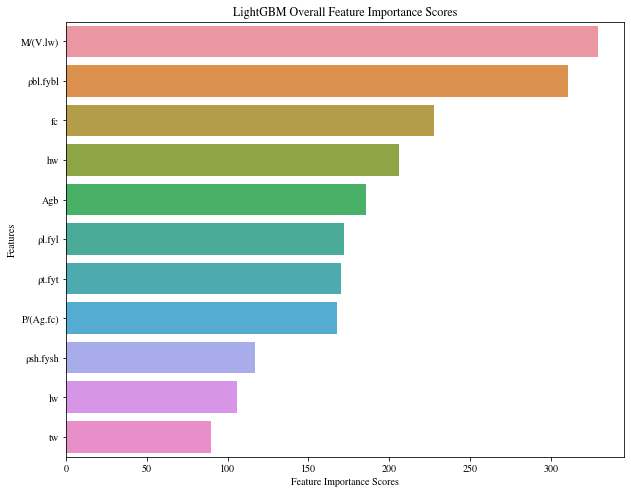

In [27]:
plt.figure(figsize = (10, 8))
sns.barplot(x=feature_imp_final, y=feature_imp_final.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("LightGBM Overall Feature Importance Scores")
plt.show()

In [28]:
# Feature-selection based on the feature importance scores obtained above
acc_scores = {"all": [], "S": [], "SF": [], "F": []}
selected_features = []
Z = X.copy()

lgbm_sel = LGBMClassifier(n_estimators=100, num_leaves=8, subsample=0.7, max_depth=6)

for j in range(len(Z.columns)-1):

    Z.drop(feature_imp_final.index[-(j+1)], axis=1, inplace=True)
    selected_features.append(Z.columns.to_list())
    scores = {"all": [], "S": [], "SF": [], "F": []}

    for i in randomlist:
        Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=i)
        lgbm_sel.fit(Z_train, y_train)
        y_pred_test = lgbm_sel.predict(Z_test)
        scores["all"].append(accuracy_score(y_test, y_pred_test))
        scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
        scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
        scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

    acc_scores["all"].append(np.mean(scores['all']))
    acc_scores["S"].append(np.mean(scores['S']))
    acc_scores["SF"].append(np.mean(scores['SF']))
    acc_scores["F"].append(np.mean(scores['F']))

In [29]:
for i in acc_scores["all"]:
    print(i)

0.8386206896551723
0.8352873563218393
0.8357471264367817
0.8162068965517242
0.8211494252873563
0.8158620689655172
0.8075862068965516
0.7805747126436781
0.7698850574712643
0.705632183908046


In [30]:
for i in acc_scores["S"]:
    print(i)

0.8787327451378151
0.8671208869598029
0.8695474626778315
0.8692406063777796
0.8772380870806554
0.8728134200914588
0.8570453422196325
0.8450386777469663
0.8219845084538498
0.7967909480059798


In [31]:
for i in acc_scores["SF"]:
    print(i)

0.7930163286968168
0.7962369531502332
0.784475032088121
0.7462674026400812
0.7430849049064062
0.7397794722627242
0.7400683621929636
0.7070006416955447
0.7044717307615765
0.6928260937578284


In [32]:
for i in acc_scores["F"]:
    print(i)

0.8341195686297729
0.8334605251479336
0.8428737356910686
0.821660288370566
0.833841591411979
0.8218697473504143
0.8110200106732246
0.7671621182366742
0.7596428769948956
0.6222315121401341


## CatBoost

In [33]:
# catb parameters were obtained previously using gridsearch cv with 5 fold cross-validation
catb = CatBoostClassifier(depth=5, iterations=100, silent=True)
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    catb.fit(X_train, y_train)
    y_pred_train = catb.predict(X_train)
    y_pred_test = catb.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])
    feature_imp = pd.Series(catb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    feature_imp_scores = pd.concat([feature_imp_scores, feature_imp], axis=1) 

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

feature_imp_scores["std"] = feature_imp_scores.std(axis=1)
feature_imp_scores["mean"] = feature_imp_scores.mean(axis=1)
feature_imp_scores = feature_imp_scores.sort_values(by=["mean"], ascending=False)
feature_imp_final = pd.Series(feature_imp_scores["mean"].values, feature_imp_scores.index).sort_values(ascending=False)

Average Training Accuracy Score: 0.9996
Standard Deviation of Training Accuracy Scores: 0.001
Average Testing Accuracy Score: 0.8457
Standard Deviation of Testing Accuracy Scores: 0.0369
Average Precision of S Score: 0.8753
Average Precision of SF Score: 0.8094
Average Precision of F Score: 0.8452
Random state that gives the best accuracy: 5269
Random state that gives the worst accuracy: 1381


In [34]:
df_scores_catb = pd.DataFrame()
df_scores_catb["All"] = scores["testing"]
df_scores_catb["S"] = scores["S"]
df_scores_catb["SF"] = scores["SF"]
df_scores_catb["F"] = scores["F"]

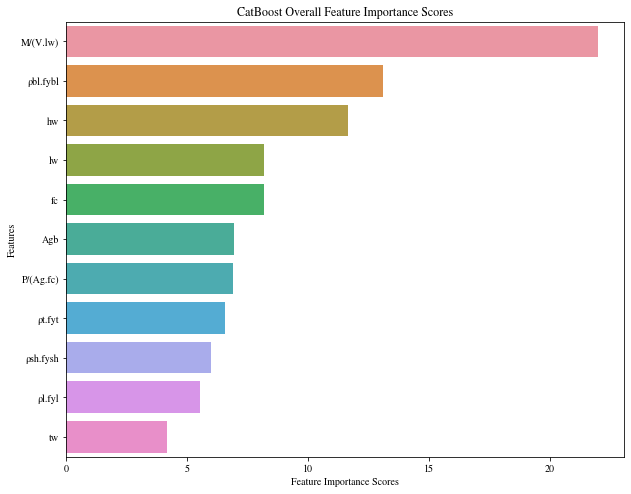

In [35]:
plt.figure(figsize = (10, 8))
sns.barplot(x=feature_imp_final, y=feature_imp_final.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("CatBoost Overall Feature Importance Scores")
plt.show()

In [36]:
# Feature-selection based on the feature importance scores obtained above
acc_scores = {"all": [], "S": [], "SF": [], "F": []}
selected_features = []
Z = X.copy()

catb_sel = CatBoostClassifier(depth=5, iterations=100, silent=True)

for j in range(len(Z.columns)-1):

    Z.drop(feature_imp_final.index[-(j+1)], axis=1, inplace=True)
    selected_features.append(Z.columns.to_list())
    scores = {"all": [], "S": [], "SF": [], "F": []}

    for i in randomlist:
        Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=i)
        catb_sel.fit(Z_train, y_train)
        y_pred_test = catb_sel.predict(Z_test)
        scores["all"].append(accuracy_score(y_test, y_pred_test))
        scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
        scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
        scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

    acc_scores["all"].append(np.mean(scores['all']))
    acc_scores["S"].append(np.mean(scores['S']))
    acc_scores["SF"].append(np.mean(scores['SF']))
    acc_scores["F"].append(np.mean(scores['F']))

In [37]:
for i in acc_scores["all"]:
    print(i)

0.838735632183908
0.8488505747126436
0.8456321839080458
0.8489655172413793
0.8303448275862069
0.8241379310344827
0.8236781609195403
0.8227586206896551
0.7928735632183909
0.7073563218390805


In [38]:
for i in acc_scores["S"]:
    print(i)

0.8739891651276198
0.8830367438580349
0.8763076911791944
0.8868799407003242
0.8830867747241995
0.8667377767033397
0.8722579402123786
0.8594327887083777
0.8421160254953725
0.7941586459019107


In [39]:
for i in acc_scores["SF"]:
    print(i)

0.794258071536105
0.8071738023053556
0.8093605254866755
0.8009334487348742
0.7695497855842433
0.7605121162191151
0.7601547880420799
0.7717773772314573
0.7261800187859158
0.699445772633029


In [40]:
for i in acc_scores["F"]:
    print(i)

0.83993129823773
0.8496866689620629
0.842492562159003
0.8504683240476142
0.8244551902013412
0.8344722393205406
0.8254967660905073
0.8274401277598509
0.7943291252224911
0.6258805448575759


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5269)
catb_tuned = CatBoostClassifier(depth=5, iterations=100, silent=True).fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy of the Best Case: %.2f%%' % (acc_score * 100))
print(f"Confusion Matrix of the Best Case:\n{confusion_matrix(y_test, y_pred)}")

Accuracy of the Best Case: 94.25%
Confusion Matrix of the Best Case:
[[33  0  0]
 [ 2 27  2]
 [ 0  1 22]]


In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1381)
catb_tuned = CatBoostClassifier(depth=5, iterations=100, silent=True).fit(X_train, y_train)
y_pred = catb_tuned.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
print('Accuracy of the Worst Case: %.2f%%' % (acc_score * 100))
print(f"Confusion Matrix of the Worst Case:\n{confusion_matrix(y_test, y_pred)}")

Accuracy of the Worst Case: 74.71%
Confusion Matrix of the Worst Case:
[[26  6  1]
 [ 6 20  5]
 [ 3  1 19]]


## XGBoost

In [44]:
# xgb parameters were obtained previously using gridsearch cv with 5 fold cross-validation
xgb = XGBClassifier(verbosity=0, colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=100)
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    xgb.fit(X_train, y_train)
    y_pred_train = xgb.predict(X_train)
    y_pred_test = xgb.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])
    feature_imp = pd.Series(xgb.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    feature_imp_scores = pd.concat([feature_imp_scores, feature_imp], axis=1) 

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

feature_imp_scores["std"] = feature_imp_scores.std(axis=1)
feature_imp_scores["mean"] = feature_imp_scores.mean(axis=1)
feature_imp_scores = feature_imp_scores.sort_values(by=["mean"], ascending=False)
feature_imp_final = pd.Series(feature_imp_scores["mean"].values, feature_imp_scores.index).sort_values(ascending=False)

Average Training Accuracy Score: 0.9994
Standard Deviation of Training Accuracy Scores: 0.0012
Average Testing Accuracy Score: 0.8518
Standard Deviation of Testing Accuracy Scores: 0.0347
Average Precision of S Score: 0.8674
Average Precision of SF Score: 0.8319
Average Precision of F Score: 0.852
Random state that gives the best accuracy: 7750
Random state that gives the worst accuracy: 2985


In [45]:
df_scores_xgb = pd.DataFrame()
df_scores_xgb["All"] = scores["testing"]
df_scores_xgb["S"] = scores["S"]
df_scores_xgb["SF"] = scores["SF"]
df_scores_xgb["F"] = scores["F"]

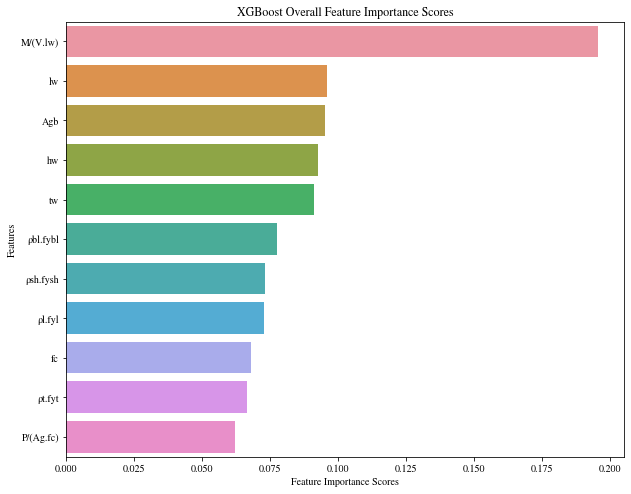

In [46]:
plt.figure(figsize = (10, 8))
sns.barplot(x=feature_imp_final, y=feature_imp_final.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("XGBoost Overall Feature Importance Scores")
plt.show()

In [47]:
# Feature-selection based on the feature importance scores obtained above
acc_scores = {"all": [], "S": [], "SF": [], "F": []}
selected_features = []
Z = X.copy()

xgb_sel = XGBClassifier(verbosity=0, colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=100)

for j in range(len(Z.columns)-1):

    Z.drop(feature_imp_final.index[-(j+1)], axis=1, inplace=True)
    selected_features.append(Z.columns.to_list())
    scores = {"all": [], "S": [], "SF": [], "F": []}

    for i in randomlist:
        Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=i)
        xgb_sel.fit(Z_train, y_train)
        y_pred_test = xgb_sel.predict(Z_test)
        scores["all"].append(accuracy_score(y_test, y_pred_test))
        scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
        scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
        scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

    acc_scores["all"].append(np.mean(scores['all']))
    acc_scores["S"].append(np.mean(scores['S']))
    acc_scores["SF"].append(np.mean(scores['SF']))
    acc_scores["F"].append(np.mean(scores['F']))

In [48]:
for i in acc_scores["all"]:
    print(i)

0.837241379310345
0.8373563218390805
0.8382758620689655
0.8350574712643677
0.8194252873563219
0.8165517241379311
0.8118390804597702
0.802528735632184
0.7714942528735632
0.7068965517241379


In [49]:
for i in acc_scores["S"]:
    print(i)

0.8723299529582758
0.862040129734956
0.8687425502567753
0.8814467827070607
0.8635268806276993
0.852437764502288
0.8528498761159119
0.8444890274888824
0.830343795115866
0.792895281322119


In [50]:
for i in acc_scores["SF"]:
    print(i)

0.8043710039764969
0.8196809606301447
0.8095565358157494
0.7920540476715007
0.7618506041676533
0.7766460391279528
0.772189327354173
0.7668178321903534
0.7293857238113358
0.6981185613246419


In [51]:
for i in acc_scores["F"]:
    print(i)

0.8249158640130417
0.8234381175224046
0.8266522387652082
0.8181978035445558
0.8219495469533332
0.811667354363736
0.8015154777459155
0.7840374483759186
0.7415355214992269
0.6284277801644245


## SVM

In [ ]:
svm = SVC()

svm_params = {
    'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50 ,100],
    "kernel":['linear','poly','rbf','sigmoid'],
    "gamma": ["auto", "scale"]
}

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
gs_cv = GridSearchCV(svm,
                    svm_params,
                    cv = 5, 
                    n_jobs = -1, 
                    verbose = 2 
                    ).fit(X_train, y_train)
print(f"Best Params: {gs_cv.best_params_}")
svm_tuned = SVC(**gs_cv.best_params_).fit(X_train, y_train)
y_pred = svm_tuned.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(score, 4)}")

In [57]:
svm = SVC(C=1, gamma="auto", kernel="rbf")
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=i)
    svm.fit(X_train, y_train)
    y_pred_train = svm.predict(X_train)
    y_pred_test = svm.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

Average Training Accuracy Score: 0.8288
Standard Deviation of Training Accuracy Scores: 0.0096
Average Testing Accuracy Score: 0.7626
Standard Deviation of Testing Accuracy Scores: 0.0411
Average Precision of S Score: 0.7885
Average Precision of SF Score: 0.6922
Average Precision of F Score: 0.7965
Random state that gives the best accuracy: 9320
Random state that gives the worst accuracy: 2985


In [58]:
df_scores_svm = pd.DataFrame()
df_scores_svm["All"] = scores["testing"]
df_scores_svm["S"] = scores["S"]
df_scores_svm["SF"] = scores["SF"]
df_scores_svm["F"] = scores["F"]

## MLP

In [ ]:
mlp = MLPClassifier()

mlp_params = {"alpha": [1, 0.1, 0.01, 0.001], # regularization parameter
              "hidden_layer_sizes": [(5, 5),
                                     (10, 10), 
                                     (10, 10, 10)],
              "solver" : ["lbfgs","adam","sgd"], 
               # lbfgs: quasi-Newton metodu
               # sgd: stochastic gradient descent
               # adam: stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba
              "activation": ["tanh","logistic", "relu"]}

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
gs_cv = GridSearchCV(mlp,
                     mlp_params,
                     cv = 5, 
                     n_jobs = -1, # -1 means using all processors
                     verbose = 2 
                     ).fit(X_train, y_train)
print(f"Best params: {gs_cv.best_params_}")
mlp_tuned = MLPClassifier(**gs_cv.best_params_).fit(X_train, y_train)
y_pred = mlp_tuned.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(score, 4)}")

In [59]:
mlp = MLPClassifier(activation="tanh", alpha=0.1, solver="lbfgs", hidden_layer_sizes=(10,10))
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=i)
    mlp.fit(X_train, y_train)
    y_pred_train = mlp.predict(X_train)
    y_pred_test = mlp.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

Average Training Accuracy Score: 0.9997
Standard Deviation of Training Accuracy Scores: 0.0012
Average Testing Accuracy Score: 0.7823
Standard Deviation of Testing Accuracy Scores: 0.0467
Average Precision of S Score: 0.8627
Average Precision of SF Score: 0.6974
Average Precision of F Score: 0.7797
Random state that gives the best accuracy: 2610
Random state that gives the worst accuracy: 452


In [60]:
df_scores_mlp = pd.DataFrame()
df_scores_mlp["All"] = scores["testing"]
df_scores_mlp["S"] = scores["S"]
df_scores_mlp["SF"] = scores["SF"]
df_scores_mlp["F"] = scores["F"]

## Random Forests

In [ ]:
rf = RandomForestClassifier()

rf_params = {"max_depth": [3, 6, 8, 10], 
            "max_features": [2, 5, 8], # The number of features to consider when looking for the best split
            "n_estimators": [50, 100, 150, 200], 
            "min_samples_split": [2, 5, 8, 10]}  # The minimum number of samples required to split an internal node

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
gs_cv = GridSearchCV(rf,
                     rf_params,
                     cv = 5, 
                     n_jobs = -1, # -1 means using all processors
                     verbose = 2  # The higher, the more messages.
                     ).fit(X_train, y_train)
print(f"Best params: {gs_cv.best_params_}")
rf_tuned = RandomForestClassifier(**gs_cv.best_params_).fit(X_train, y_train)
y_pred = rf_tuned.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(score, 4)}")

In [61]:
rf = RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=2, n_estimators=100)
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)
    rf.fit(X_train, y_train)
    y_pred_train = rf.predict(X_train)
    y_pred_test = rf.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])
    feature_imp = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
    feature_imp_scores = pd.concat([feature_imp_scores, feature_imp], axis=1) 

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

feature_imp_scores["std"] = feature_imp_scores.std(axis=1)
feature_imp_scores["mean"] = feature_imp_scores.mean(axis=1)
feature_imp_scores = feature_imp_scores.sort_values(by=["mean"], ascending=False)
feature_imp_final = pd.Series(feature_imp_scores["mean"].values, feature_imp_scores.index).sort_values(ascending=False)

Average Training Accuracy Score: 0.9996
Standard Deviation of Training Accuracy Scores: 0.0011
Average Testing Accuracy Score: 0.837
Standard Deviation of Testing Accuracy Scores: 0.0355
Average Precision of S Score: 0.8604
Average Precision of SF Score: 0.8012
Average Precision of F Score: 0.8451
Random state that gives the best accuracy: 7750
Random state that gives the worst accuracy: 2573


In [62]:
df_scores_rf = pd.DataFrame()
df_scores_rf["All"] = scores["testing"]
df_scores_rf["S"] = scores["S"]
df_scores_rf["SF"] = scores["SF"]
df_scores_rf["F"] = scores["F"]

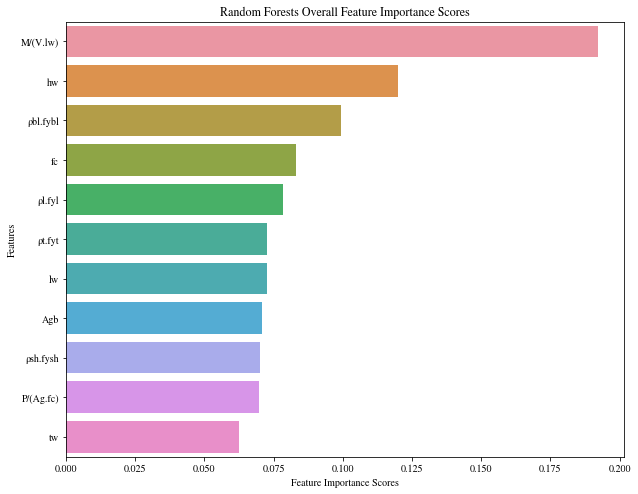

In [63]:
plt.figure(figsize = (10, 8))
sns.barplot(x=feature_imp_final, y=feature_imp_final.index)
plt.xlabel('Feature Importance Scores')
plt.ylabel('Features')
plt.title("Random Forests Overall Feature Importance Scores")
plt.show()

In [64]:
# Feature-selection based on the feature importance scores obtained above
acc_scores = {"all": [], "S": [], "SF": [], "F": []}
selected_features = []
Z = X.copy()

rf_sel = RandomForestClassifier(max_depth=10, min_samples_split=2, n_estimators=100)

for j in range(len(Z.columns)-1):

    Z.drop(feature_imp_final.index[-(j+1)], axis=1, inplace=True)
    selected_features.append(Z.columns.to_list())
    scores = {"all": [], "S": [], "SF": [], "F": []}

    for i in randomlist:
        Z_train, Z_test, y_train, y_test = train_test_split(Z, y, test_size=0.2, random_state=i)
        rf_sel.fit(Z_train, y_train)
        y_pred_test = rf_sel.predict(Z_test)
        scores["all"].append(accuracy_score(y_test, y_pred_test))
        scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
        scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
        scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

    acc_scores["all"].append(np.mean(scores['all']))
    acc_scores["S"].append(np.mean(scores['S']))
    acc_scores["SF"].append(np.mean(scores['SF']))
    acc_scores["F"].append(np.mean(scores['F']))

In [65]:
for i in acc_scores["all"]:
    print(i)

0.8348275862068966
0.8160919540229883
0.8232183908045977
0.8134482758620689
0.8113793103448278
0.8118390804597702
0.8112643678160919
0.8190804597701148
0.806551724137931
0.7019540229885056


In [67]:
for i in acc_scores["S"]:
    print(i)

0.8615981461710338
0.8596923558358776
0.8568904965036853
0.8415518935327263
0.840637784324155
0.8523430479453077
0.8555110819869882
0.8642659457251715
0.8449043173030552
0.7890303087562006


In [68]:
for i in acc_scores["SF"]:
    print(i)

0.7917500892720193
0.7524362893296669
0.7700626799021398
0.7618918027892185
0.7520668294910291
0.7442610854311361
0.7551300180718524
0.7655954394681558
0.7794022826732633
0.6995191938636198


In [69]:
for i in acc_scores["F"]:
    print(i)

0.8467064218108098
0.8290390601521406
0.8329889921944287
0.8276394676160234
0.8325914216767485
0.8284618283347313
0.8093726666774065
0.8130242833671931
0.7846593395218585
0.6150901738906199


## Logistic Regression

In [ ]:
lr = LogisticRegression()

lr_params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
            'fit_intercept': [True, False],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            "penalty": ["l1", "l2", "elasticnet", "none"]
            }

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)
gs_cv = GridSearchCV(lr,
                     lr_params,
                     cv = 5, 
                     n_jobs = -1,
                     verbose = 2  
                     ).fit(X_train, y_train)
print(f"Best params: {gs_cv.best_params_}")   
lr_tuned = LogisticRegression(**gs_cv.best_params_).fit(X_train, y_train)
y_pred = lr_tuned.predict(X_test)
score = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {round(score, 4)}")

In [70]:
lr = LogisticRegression(C=0.001, penalty="none", solver="newton-cg")
scores = {"training": [], "testing": [], "S": [], "SF": [], "F": []}
feature_imp_scores = pd.DataFrame()

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=i)
    lr.fit(X_train, y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    train_acc_score = accuracy_score(y_train, y_pred_train)
    test_acc_score = accuracy_score(y_test, y_pred_test)
    scores["training"].append(train_acc_score)
    scores["testing"].append(test_acc_score)
    scores["S"].append(precision_score(y_test, y_pred_test, average=None)[0])
    scores["SF"].append(precision_score(y_test, y_pred_test, average=None)[1])
    scores["F"].append(precision_score(y_test, y_pred_test, average=None)[2])

print(f"Average Training Accuracy Score: {round(np.mean(scores['training']), 4)}")
print(f"Standard Deviation of Training Accuracy Scores: {round(np.std(scores['training']), 4)}")
print(f"Average Testing Accuracy Score: {round(np.mean(scores['testing']), 4)}")
print(f"Standard Deviation of Testing Accuracy Scores: {round(np.std(scores['testing']), 4)}")

print(f"Average Precision of S Score: {round(np.mean(scores['S']), 4)}")
print(f"Average Precision of SF Score: {round(np.mean(scores['SF']), 4)}")
print(f"Average Precision of F Score: {round(np.mean(scores['F']), 4)}")

print("Random state that gives the best accuracy:", randomlist[np.argmax(scores["testing"])])
print("Random state that gives the worst accuracy:", randomlist[np.argmin(scores["testing"])])

Average Training Accuracy Score: 0.7321
Standard Deviation of Training Accuracy Scores: 0.0151
Average Testing Accuracy Score: 0.6946
Standard Deviation of Testing Accuracy Scores: 0.0476
Average Precision of S Score: 0.7769
Average Precision of SF Score: 0.5713
Average Precision of F Score: 0.6983
Random state that gives the best accuracy: 5909
Random state that gives the worst accuracy: 682


In [71]:
df_scores_lr = pd.DataFrame()
df_scores_lr["All"] = scores["testing"]
df_scores_lr["S"] = scores["S"]
df_scores_lr["SF"] = scores["SF"]
df_scores_lr["F"] = scores["F"]

## Overall Evaluation

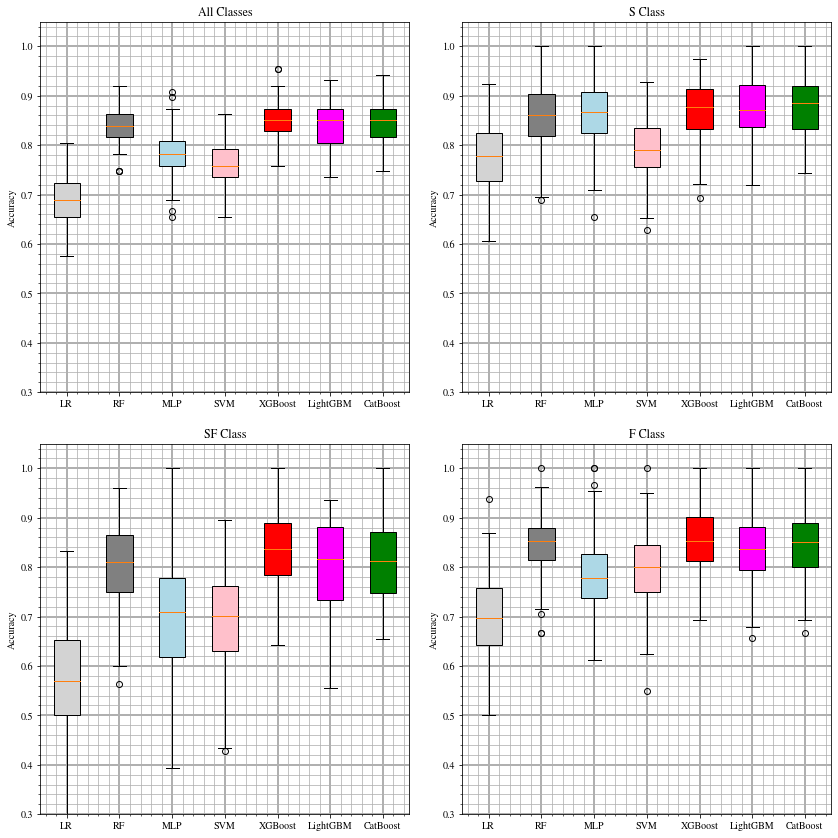

In [73]:
all_dict = {'LR': df_scores_lr["All"].values, 'RF': df_scores_rf["All"].values,
           'MLP': df_scores_mlp["All"].values, 'SVM': df_scores_svm["All"].values,
           'XGBoost': df_scores_xgb["All"].values, 'LightGBM': df_scores_lgbm["All"].values,
           'CatBoost': df_scores_catb["All"].values,
           }

s_dict = {'LR': df_scores_lr["S"].values, 'RF': df_scores_rf["S"].values,
           'MLP': df_scores_mlp["S"].values, 'SVM': df_scores_svm["S"].values,
           'XGBoost': df_scores_xgb["S"].values, 'LightGBM': df_scores_lgbm["S"].values,
           'CatBoost': df_scores_catb["S"].values,
           }

sf_dict = {'LR': df_scores_lr["SF"].values, 'RF': df_scores_rf["SF"].values,
           'MLP': df_scores_mlp["SF"].values, 'SVM': df_scores_svm["SF"].values,
           'XGBoost': df_scores_xgb["SF"].values, 'LightGBM': df_scores_lgbm["SF"].values,
           'CatBoost': df_scores_catb["SF"].values,
           }

f_dict = {'LR': df_scores_lr["F"].values, 'RF': df_scores_rf["F"].values,
           'MLP': df_scores_mlp["F"].values, 'SVM': df_scores_svm["F"].values,
           'XGBoost': df_scores_xgb["F"].values, 'LightGBM': df_scores_lgbm["F"].values,
           'CatBoost': df_scores_catb["F"].values,
           }

fig, axs = plt.subplots(2, 2, figsize=(12, 12))

colours = ["lightgray", "gray", "lightblue", "pink", "red", "magenta", "green"]

axs[0, 0].set_title("All Classes")
bplot1 = axs[0, 0].boxplot(all_dict.values(), patch_artist=True)
axs[0, 0].set_xticklabels(all_dict.keys())
axs[0, 0].set_ylabel("Accuracy")
axs[0, 0].set_ylim([0.3, 1.05])
axs[0, 0].grid(which="minor", linewidth=0.75)
axs[0, 0].grid(which="major", linewidth=2)
axs[0, 0].minorticks_on()
for patch, color in zip(bplot1['boxes'], colours):
    patch.set_facecolor(color)

axs[0, 1].set_title("S Class")
bplot2 = axs[0, 1].boxplot(s_dict.values(), patch_artist=True)
axs[0, 1].set_xticklabels(s_dict.keys())
axs[0, 1].set_ylabel("Accuracy")
axs[0, 1].set_ylim([0.3, 1.05])
axs[0, 1].grid(which="minor", linewidth=0.75)
axs[0, 1].grid(which="major", linewidth=2)
axs[0, 1].minorticks_on()
for patch, color in zip(bplot2['boxes'], colours):
    patch.set_facecolor(color)

axs[1, 0].set_title("SF Class")
bplot3 = axs[1, 0].boxplot(sf_dict.values(), patch_artist=True)
axs[1, 0].set_xticklabels(sf_dict.keys())
axs[1, 0].set_ylabel("Accuracy")
axs[1, 0].set_ylim([0.3, 1.05])
axs[1, 0].grid(which="minor", linewidth=0.75)
axs[1, 0].grid(which="major", linewidth=2)
axs[1, 0].minorticks_on()
for patch, color in zip(bplot3['boxes'], colours):
    patch.set_facecolor(color)

axs[1, 1].set_title("F Class")
bplot4 = axs[1, 1].boxplot(f_dict.values(), patch_artist=True)
axs[1, 1].set_xticklabels(f_dict.keys())
axs[1, 1].set_ylabel("Accuracy")
axs[1, 1].set_ylim([0.3, 1.05])
axs[1, 1].grid(which="minor", linewidth=0.75)
axs[1, 1].grid(which="major", linewidth=2)
axs[1, 1].minorticks_on()
for patch, color in zip(bplot4['boxes'], colours):
    patch.set_facecolor(color)

plt.tight_layout(pad=2)

plt.show()

## McNemar Test for Boosting Models and RF

In [ ]:
lgb = LGBMClassifier(n_estimators=100, num_leaves=8, subsample=0.7, max_depth=6)
catb = CatBoostClassifier(depth=5, iterations=200, silent=True)
xgb = XGBClassifier(verbosity=0, colsample_bytree=0.3, learning_rate=0.1, max_depth=6, n_estimators=100)
rf = RandomForestClassifier(max_depth=10, max_features=2, min_samples_split=2, n_estimators=100)

lgb_preds = np.empty([0])
catb_preds = np.empty([0])
xgb_preds = np.empty([0])
rf_preds = np.empty([0])


for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=i)

    lgb.fit(X_train, y_train)
    catb.fit(X_train, y_train)
    xgb.fit(X_train, y_train)
    rf.fit(X_train, y_train)
    
    y_pred_lgb = lgb.predict(X_test)
    y_pred_catb = catb.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    y_pred_rf = rf.predict(X_test)

    lgb_preds = np.concatenate((lgb_preds, (y_pred_lgb==y_test).values), axis=0)
    catb_preds= np.concatenate((catb_preds, (y_pred_catb.T[0]==y_test).values), axis=0)
    xgb_preds = np.concatenate((xgb_preds, (y_pred_xgb==y_test).values), axis=0)
    rf_preds = np.concatenate((rf_preds, (y_pred_rf==y_test).values), axis=0)

In [ ]:
confusion_matrix(lgb_preds, catb_preds)

array([[1101,  291],
       [ 224, 7084]])

In [ ]:
cm = confusion_matrix(lgb_preds, catb_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis rejected
There is significant difference - p value : 0.003153420127748996


In [ ]:
confusion_matrix(lgb_preds, xgb_preds)

array([[1051,  341],
       [ 238, 7070]])

In [ ]:
cm = confusion_matrix(lgb_preds, xgb_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis rejected
There is significant difference - p value : 1.8644546609491996e-05


In [ ]:
confusion_matrix(lgb_preds, rf_preds)

array([[1102,  290],
       [ 300, 7008]])

In [ ]:
cm = confusion_matrix(lgb_preds, rf_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis can not be rejected
There is not significant difference - p value : 0.6805641009753117


In [ ]:
confusion_matrix(xgb_preds, catb_preds)

array([[1058,  231],
       [ 267, 7144]])

In [ ]:
cm = confusion_matrix(xgb_preds, catb_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis can not be rejected
There is not significant difference - p value : 0.10670137321371764


In [ ]:
confusion_matrix(xgb_preds, rf_preds)

array([[1134,  155],
       [ 268, 7143]])

In [ ]:
cm = confusion_matrix(xgb_preds, rf_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis rejected
There is significant difference - p value : 3.923787428306014e-08


In [ ]:
confusion_matrix(catb_preds, rf_preds)

array([[1131,  194],
       [ 271, 7104]])

In [ ]:
cm = confusion_matrix(catb_preds, rf_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis rejected
There is significant difference - p value : 0.0003559068452826386


## SVM and MLP McNemar Test

In [ ]:
svm = SVC(C=50, gamma="auto", kernel="rbf")
mlp = MLPClassifier(activation="tanh", alpha=1, solver="lbfgs", hidden_layer_sizes=(10,10))

svm_preds = np.empty([0])
mlp_preds = np.empty([0])

for i in randomlist:
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=i)

    svm.fit(X_train, y_train)
    mlp.fit(X_train, y_train)
   
    y_pred_svm = svm.predict(X_test)
    y_pred_mlp = mlp.predict(X_test)

    svm_preds = np.concatenate((svm_preds, (y_pred_svm==y_test).values), axis=0)
    mlp_preds = np.concatenate((mlp_preds, (y_pred_mlp==y_test).values), axis=0)

In [ ]:
confusion_matrix(svm_preds, mlp_preds)

array([[1231,  515],
       [ 627, 6327]])

In [ ]:
cm = confusion_matrix(svm_preds, mlp_preds)
# McNemars Statistic 
MCStatistic = ((cm[0,1] - cm[1,0])**2 )/ (cm[0,1] + cm[1,0])

# Degree of freedom (n-1)*(k-1)
degreOfFreedom = (len(cm[0])-1) * (len(cm[1])-1)

# Obtain p-value from Chi-Sqaure Distribution
r1 = 1- stats.chi2.cdf(MCStatistic , degreOfFreedom)
r2 = stats.distributions.chi2.sf(MCStatistic , degreOfFreedom)

if r1 > 0.05:
    print('Null hypothesis can not be rejected')
    print('There is not significant difference - p value :' , r1)
else:
    print('Null hypothesis rejected')
    print('There is significant difference - p value :' , r1)

Null hypothesis rejected
There is significant difference - p value : 0.0009189004749233787
